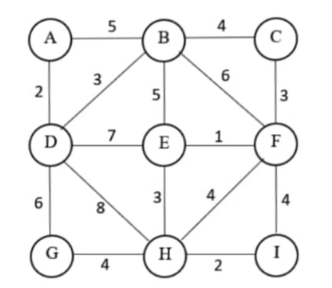

## Find the minimum spanning tree for the graph given below using both Prim's and Kruskal’s algorithms.




<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <style>
    table {
      border-collapse: collapse;
      margin-top: 20px;
    }

    table, th, td {
      border: 1px solid black;
    }

    th, td {
      padding: 10px;
      text-align: center;
    }
  </style>
</head>
<body>

  <h2>Adjacency Matrix</h2>

  <table>
    <thead>
      <tr>
        <th></th>
        <th>A</th>
        <th>B</th>
        <th>C</th>
        <th>D</th>
        <th>E</th>
        <th>F</th>
        <th>G</th>
        <th>H</th>
        <th>I</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>A</th>
        <td>0</td>
        <td>5</td>
        <td>0</td>
        <td>2</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
      </tr>
      <tr>
        <th>B</th>
        <td>5</td>
        <td>0</td>
        <td>4</td>
        <td>3</td>
        <td>5</td>
        <td>6</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
      </tr>
      <tr>
        <th>C</th>
        <td>0</td>
        <td>4</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>3</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
      </tr>
      <tr>
        <th>D</th>
        <td>2</td>
        <td>3</td>
        <td>0</td>
        <td>0</td>
        <td>7</td>
        <td>0</td>
        <td>6</td>
        <td>8</td>
        <td>0</td>
      </tr>
      <tr>
        <th>E</th>
        <td>0</td>
        <td>5</td>
        <td>0</td>
        <td>7</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
        <td>3</td>
        <td>0</td>
      </tr>
      <tr>
        <th>F</th>
        <td>0</td>
        <td>6</td>
        <td>3</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
        <td>0</td>
        <td>4</td>
        <td>4</td>
      </tr>
      <tr>
        <th>G</th>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>6</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>4</td>
        <td>0</td>
      </tr>
      <tr>
        <th>H</th>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>8</td>
        <td>3</td>
        <td>4</td>
        <td>4</td>
        <td>0</td>
        <td>2</td>
      </tr>
      <tr>
        <th>I</th>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>4</td>
        <td>0</td>
        <td>2</td>
        <td>0</td>
      </tr>
    </tbody>

In [ ]:
import numpy as np
from pprint import pprint

def matrix2graph(graph_matrix,n):
  graph_dict = {}
  for i in range(n):
      node_connections = {}
      for j in range(n):
          if graph_matrix[i][j] != 0:
              node_connections[nodes[j]] = graph_matrix[i][j]
      graph_dict[nodes[i]] = node_connections
  return graph_dict

graph = np.array([[0,5,0,2,0,0,0,0,0],
[5,0,4,3,5,6,0,0,0],
[0,4,0,0,0,3,0,0,0],
[2,3,0,0,7,0,6,8,0],
[0,5,0,7,0,1,0,3,0],
[0,6,3,0,1,0,0,4,4],
[0,0,0,6,0,0,0,4,0],
[0,0,0,8,3,4,4,0,2],
[0,0,0,0,0,4,0,2,0]])

nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
n=len(nodes)
graph = matrix2graph(graph,n)
pprint(graph)

{'A': {'B': 5, 'D': 2},
 'B': {'A': 5, 'C': 4, 'D': 3, 'E': 5, 'F': 6},
 'C': {'B': 4, 'F': 3},
 'D': {'A': 2, 'B': 3, 'E': 7, 'G': 6, 'H': 8},
 'E': {'B': 5, 'D': 7, 'F': 1, 'H': 3},
 'F': {'B': 6, 'C': 3, 'E': 1, 'H': 4, 'I': 4},
 'G': {'D': 6, 'H': 4},
 'H': {'D': 8, 'E': 3, 'F': 4, 'G': 4, 'I': 2},
 'I': {'F': 4, 'H': 2}}


###Prim's Algorithm

In [ ]:
import numpy as np
from pprint import pprint

def prim(graph,start_node):
    visited = set()
    priority_queue = [(0, start_node, None)]
    mst = {n:set() for n in nodes}
    cost = 0

    while priority_queue:
        priority_queue.sort()
        weight, current_node, parent = priority_queue.pop(0)

        if current_node not in visited:
            visited.add(current_node)
            if parent is not None:
                mst[parent].add(current_node)
                # mst.setdefault(parent, set()).add(current_node)
                cost += weight

            for neighbor, edge_weight in graph[current_node].items():
                if neighbor not in visited:
                    priority_queue.append((edge_weight, neighbor, current_node))
        print(mst)
    mst = {key: value for key, value in mst.items() if value}
    return mst, cost

nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']


graph = {'A': {'B': 5, 'D': 2},
 'B': {'A': 5, 'C': 4, 'D': 3, 'E': 5, 'F': 6},
 'C': {'B': 4, 'F': 3},
 'D': {'A': 2, 'B': 3, 'E': 7, 'G': 6, 'H': 8},
 'E': {'B': 5, 'D': 7, 'F': 1, 'H': 3},
 'F': {'B': 6, 'C': 3, 'E': 1, 'H': 4, 'I': 4},
 'G': {'D': 6, 'H': 4},
 'H': {'D': 8, 'E': 3, 'F': 4, 'G': 4, 'I': 2},
 'I': {'F': 4, 'H': 2}}

#start = input("Enter start node: ")
start = 'A'
print()
mst, cost = prim(graph,start)

print()
print("Minimum Spanning Tree:")
pprint( mst)
print("Total Cost of MST:", cost)


{'A': set(), 'B': set(), 'C': set(), 'D': set(), 'E': set(), 'F': set(), 'G': set(), 'H': set(), 'I': set()}
{'A': {'D'}, 'B': set(), 'C': set(), 'D': set(), 'E': set(), 'F': set(), 'G': set(), 'H': set(), 'I': set()}
{'A': {'D'}, 'B': set(), 'C': set(), 'D': {'B'}, 'E': set(), 'F': set(), 'G': set(), 'H': set(), 'I': set()}
{'A': {'D'}, 'B': {'C'}, 'C': set(), 'D': {'B'}, 'E': set(), 'F': set(), 'G': set(), 'H': set(), 'I': set()}
{'A': {'D'}, 'B': {'C'}, 'C': {'F'}, 'D': {'B'}, 'E': set(), 'F': set(), 'G': set(), 'H': set(), 'I': set()}
{'A': {'D'}, 'B': {'C'}, 'C': {'F'}, 'D': {'B'}, 'E': set(), 'F': {'E'}, 'G': set(), 'H': set(), 'I': set()}
{'A': {'D'}, 'B': {'C'}, 'C': {'F'}, 'D': {'B'}, 'E': {'H'}, 'F': {'E'}, 'G': set(), 'H': set(), 'I': set()}
{'A': {'D'}, 'B': {'C'}, 'C': {'F'}, 'D': {'B'}, 'E': {'H'}, 'F': {'E'}, 'G': set(), 'H': {'I'}, 'I': set()}
{'A': {'D'}, 'B': {'C'}, 'C': {'F'}, 'D': {'B'}, 'E': {'H'}, 'F': {'E'}, 'G': set(), 'H': {'I', 'G'}, 'I': set()}
{'A': {'D'}, 

### Kruskal's Algorithm

In [ ]:

import numpy as np
from pprint import pprint

def find(parent, node):
    if parent[node] != node:
        parent[node] = find(parent, parent[node])
    return parent[node]

def union(parent, rank, root1, root2):
    if rank[root1] > rank[root2]:
        parent[root2] = root1
    elif rank[root1] < rank[root2]:
        parent[root1] = root2
    else:
        parent[root1] = root2
        rank[root2] += 1

def display(i):
  for x in i:
    print(x)
  print()

def kruskal(graph):
    edges = []
    for node in graph:
        for neighbor, weight in graph[node].items():
            u = (weight, node, neighbor)
            if (u[0],)+u[:-3:-1] not in edges:
                edges.append(u)

    edges.sort()
    display(edges)
    print()
    nodes = set(node for nodes in graph for node in nodes)
    parent = {node: node for node in nodes}
    rank = {node: 0 for node in nodes}
    mst = {}
    total_cost = 0

    for weight, node1, node2 in edges:
        root1 = find(parent, node1)
        root2 = find(parent, node2)
        if root1 != root2:
            union(parent, rank, root1, root2)
            mst.setdefault(node1, set()).add(node2)
            total_cost += weight
        print(mst)


    return mst, total_cost



nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

graph_dict = {'A': {'B': 5, 'D': 2},
'B': {'A': 5, 'C': 4, 'D': 3, 'E': 5, 'F': 6},
'C': {'B': 4, 'F': 3},
'D': {'A': 2, 'B': 3, 'E': 7, 'G': 6, 'H': 8},
'E': {'B': 5, 'D': 7, 'F': 1, 'H': 3},
'F': {'B': 6, 'C': 3, 'E': 1, 'H': 4, 'I': 4},
'G': {'D': 6, 'H': 4},
'H': {'D': 8, 'E': 3, 'F': 4, 'G': 4, 'I': 2},
'I': {'F': 4, 'H': 2}}

mst, cost = kruskal(graph_dict)
print()
print("Minimum Spanning Tree:")
pprint( mst)
print("Total Cost of MST:", cost)

(1, 'E', 'F')
(2, 'A', 'D')
(2, 'H', 'I')
(3, 'B', 'D')
(3, 'C', 'F')
(3, 'E', 'H')
(4, 'B', 'C')
(4, 'F', 'H')
(4, 'F', 'I')
(4, 'G', 'H')
(5, 'A', 'B')
(5, 'B', 'E')
(6, 'B', 'F')
(6, 'D', 'G')
(7, 'D', 'E')
(8, 'D', 'H')


{'E': {'F'}}
{'E': {'F'}, 'A': {'D'}}
{'E': {'F'}, 'A': {'D'}, 'H': {'I'}}
{'E': {'F'}, 'A': {'D'}, 'H': {'I'}, 'B': {'D'}}
{'E': {'F'}, 'A': {'D'}, 'H': {'I'}, 'B': {'D'}, 'C': {'F'}}
{'E': {'H', 'F'}, 'A': {'D'}, 'H': {'I'}, 'B': {'D'}, 'C': {'F'}}
{'E': {'H', 'F'}, 'A': {'D'}, 'H': {'I'}, 'B': {'C', 'D'}, 'C': {'F'}}
{'E': {'H', 'F'}, 'A': {'D'}, 'H': {'I'}, 'B': {'C', 'D'}, 'C': {'F'}}
{'E': {'H', 'F'}, 'A': {'D'}, 'H': {'I'}, 'B': {'C', 'D'}, 'C': {'F'}}
{'E': {'H', 'F'}, 'A': {'D'}, 'H': {'I'}, 'B': {'C', 'D'}, 'C': {'F'}, 'G': {'H'}}
{'E': {'H', 'F'}, 'A': {'D'}, 'H': {'I'}, 'B': {'C', 'D'}, 'C': {'F'}, 'G': {'H'}}
{'E': {'H', 'F'}, 'A': {'D'}, 'H': {'I'}, 'B': {'C', 'D'}, 'C': {'F'}, 'G': {'H'}}
{'E': {'H', 'F'}, 'A': {'D'}, 'H': {'I'}, 'B': {'C', 'D'}, 'C

In [ ]:
import numpy as np
from pprint import pprint

def detect_loop(graph, node, visited=None, parent=None):
    visited = visited or set()
    if node in visited:
        return True
    visited.add(node)
    for neighbor in graph.get(node, []):
        if neighbor != parent:
            if detect_loop(graph, neighbor, visited, node):
                return True

    return False

def Add(graph, u, v):
    if u not in graph:
        graph[u] = set()
    if v not in graph:
        graph[v] = set()
    graph[u].add(v)
    graph[v].add(u)
    check = detect_loop(graph, u)
    if check:
        graph[u].remove(v)
        graph[v].remove(u)
    return check

def dis(pairs, graph, nodes):
    d = {k: graph[nodes.index(k[0]), nodes.index(k[1])] for k in pairs}
    return d

def sample(graph, nodes):
    pairs = [(i, nodes[j]) for i in nodes for j in range(len(nodes)) if graph[nodes.index(i), j] != 0]
    unique = []
    for i in pairs:
        if i[::-1] not in unique:
            unique.append(i)
    return dis(unique, graph, nodes)

def display(i):
    for x in i:
        print(x)
    print()

nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
n = len(nodes)

graph = np.array([[0, 5, 0, 2, 0, 0, 0, 0, 0],
                  [5, 0, 4, 3, 5, 6, 0, 0, 0],
                  [0, 4, 0, 0, 0, 3, 0, 0, 0],
                  [2, 3, 0, 0, 7, 0, 6, 8, 0],
                  [0, 5, 0, 7, 0, 1, 0, 3, 0],
                  [0, 6, 3, 0, 1, 0, 0, 4, 4],
                  [0, 0, 0, 6, 0, 0, 0, 4, 0],
                  [0, 0, 0, 8, 3, 4, 4, 0, 2],
                  [0, 0, 0, 0, 0, 4, 0, 2, 0]])

def D(i):
    return i[1]

def kruskal(graph, nodes):
    pairs = sample(graph, nodes)
    pairs = dict(sorted(pairs.items(), key=D))
    display(pairs)
    mst = {}
    cost = 0
    for i in pairs:
        if not Add(mst, *i):
            cost += pairs[i]
    mst = {key: value for key, value in mst.items() if value}
    return mst, cost

mst, cost = kruskal(graph, nodes)
print()
print("Minimum Spanning Tree:")
pprint(mst)
print("Total Cost of MST:", cost)


('E', 'F')
('A', 'D')
('H', 'I')
('B', 'D')
('C', 'F')
('E', 'H')
('B', 'C')
('F', 'H')
('F', 'I')
('G', 'H')
('A', 'B')
('B', 'E')
('B', 'F')
('D', 'G')
('D', 'E')
('D', 'H')


Minimum Spanning Tree:
{'A': {'D'},
 'B': {'C', 'D'},
 'C': {'B', 'F'},
 'D': {'B', 'A'},
 'E': {'H', 'F'},
 'F': {'C', 'E'},
 'G': {'H'},
 'H': {'E', 'I', 'G'},
 'I': {'H'}}
Total Cost of MST: 22
